In [ ]:
#!/usr/bin/env python
# coding: utf-8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'retina' # Set to retina version")
pd.set_option('display.max_columns', None) # Set max columns output
warnings.filterwarnings('ignore')

In [2]:
# Reading my dataset
df = pd.read_csv("employee_attrition_dataset.csv")
print(df.shape)
display(df.head())

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# # drop features with low variance or products of other features or with no significance in data analysis

In [4]:
df = df.drop(columns=['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'])

In [5]:
#mapping and encoding categorical variables in your DataFrame

In [6]:
education_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
education_satisfaction_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
job_involvement_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
job_satisfaction_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
performance_rating_map = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
relationship_satisfaction_map = {1: 'Low', 2:'Medium', 3:'High', 4:'Very High'}
work_life_balance_map = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
# Use the pandas apply method to numerically encode our attrition target variable
df['Education'] = df["Education"].apply(lambda x: education_map[x])
df['EnvironmentSatisfaction'] = df["EnvironmentSatisfaction"].apply(lambda x: education_satisfaction_map[x])
df['JobInvolvement'] = df["JobInvolvement"].apply(lambda x: job_involvement_map[x])
df['JobSatisfaction'] = df["JobSatisfaction"].apply(lambda x: job_satisfaction_map[x])
df['PerformanceRating'] = df["PerformanceRating"].apply(lambda x: performance_rating_map[x])
df['RelationshipSatisfaction'] = df["RelationshipSatisfaction"].apply(lambda x: relationship_satisfaction_map[x])
df['WorkLifeBalance'] = df["WorkLifeBalance"].apply(lambda x: work_life_balance_map[x])


In [7]:
display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2


In [8]:
# Describe the dataset
df.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,2.063946,6502.931293,14313.103401,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,1.106940,4707.956783,7117.786044,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,1.000000,2911.000000,8047.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,2.000000,4919.000000,14235.500000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,3.000000,8379.000000,20461.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.Age.max()

60

In [10]:
df.Age.min()

18

In [11]:
df.Age.mode()

0    35
Name: Age, dtype: int64

In [12]:
df.Age.median()


36.0

In [13]:
df.Age.mean()

36.923809523809524

In [15]:
#calculates the standard deviation for each column
df.var()

Age                        8.345505e+01
DailyRate                  1.628196e+05
DistanceFromHome           6.572125e+01
HourlyRate                 4.132856e+02
JobLevel                   1.225316e+00
MonthlyIncome              2.216486e+07
MonthlyRate                5.066288e+07
NumCompaniesWorked         6.240049e+00
PercentSalaryHike          1.339514e+01
StockOptionLevel           7.260346e-01
TotalWorkingYears          6.054056e+01
TrainingTimesLastYear      1.662219e+00
YearsAtCompany             3.753431e+01
YearsInCurrentRole         1.312712e+01
YearsSinceLastPromotion    1.038406e+01
YearsWithCurrManager       1.273160e+01
dtype: float64

In [16]:
#extract specific column
df.Age

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64

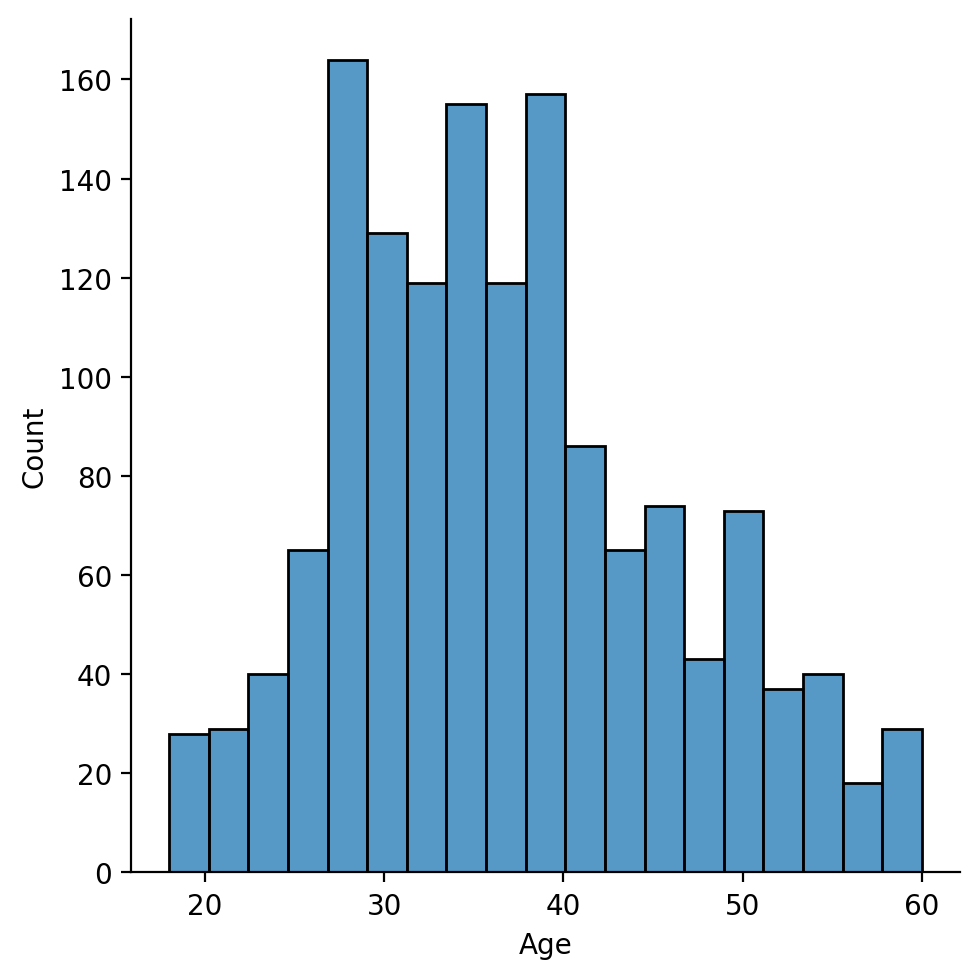

In [19]:
# # CHARTS
sns.displot(df['Age'])

<Axes: ylabel='Age'>

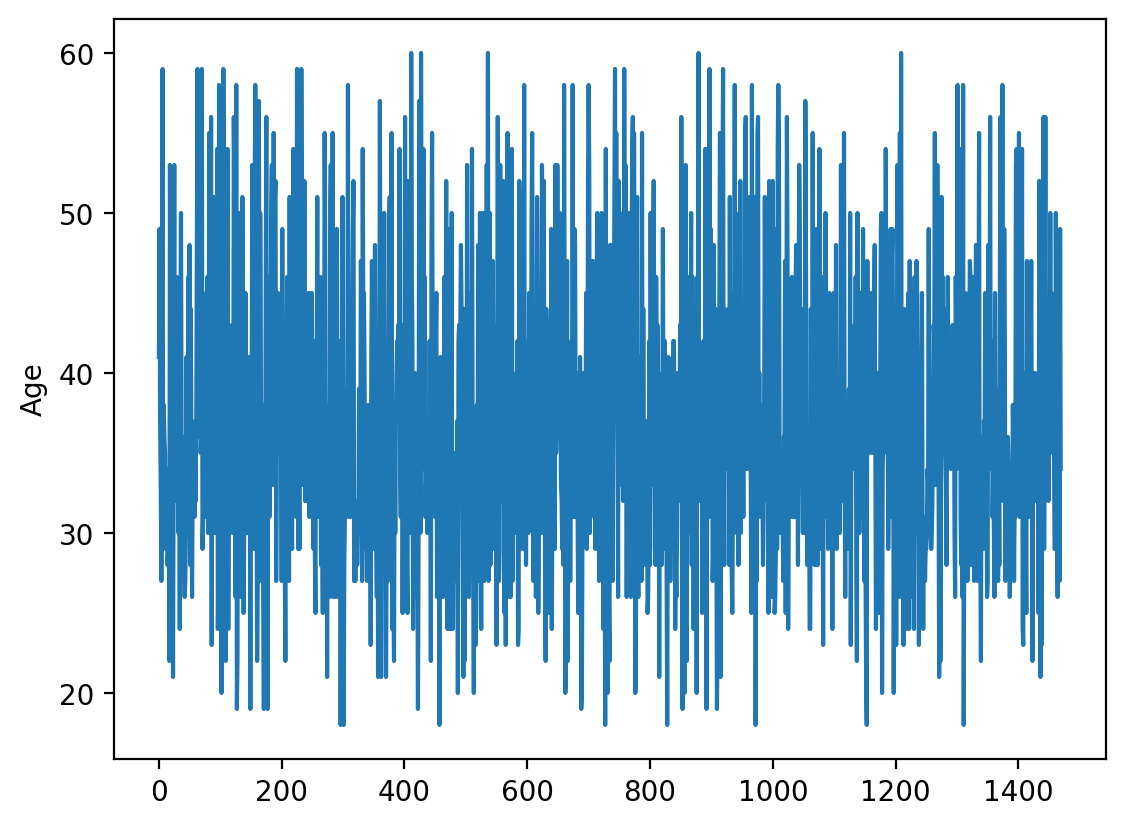

In [20]:
sns.lineplot(df['Age'])

<Axes: xlabel='DailyRate', ylabel='Count'>

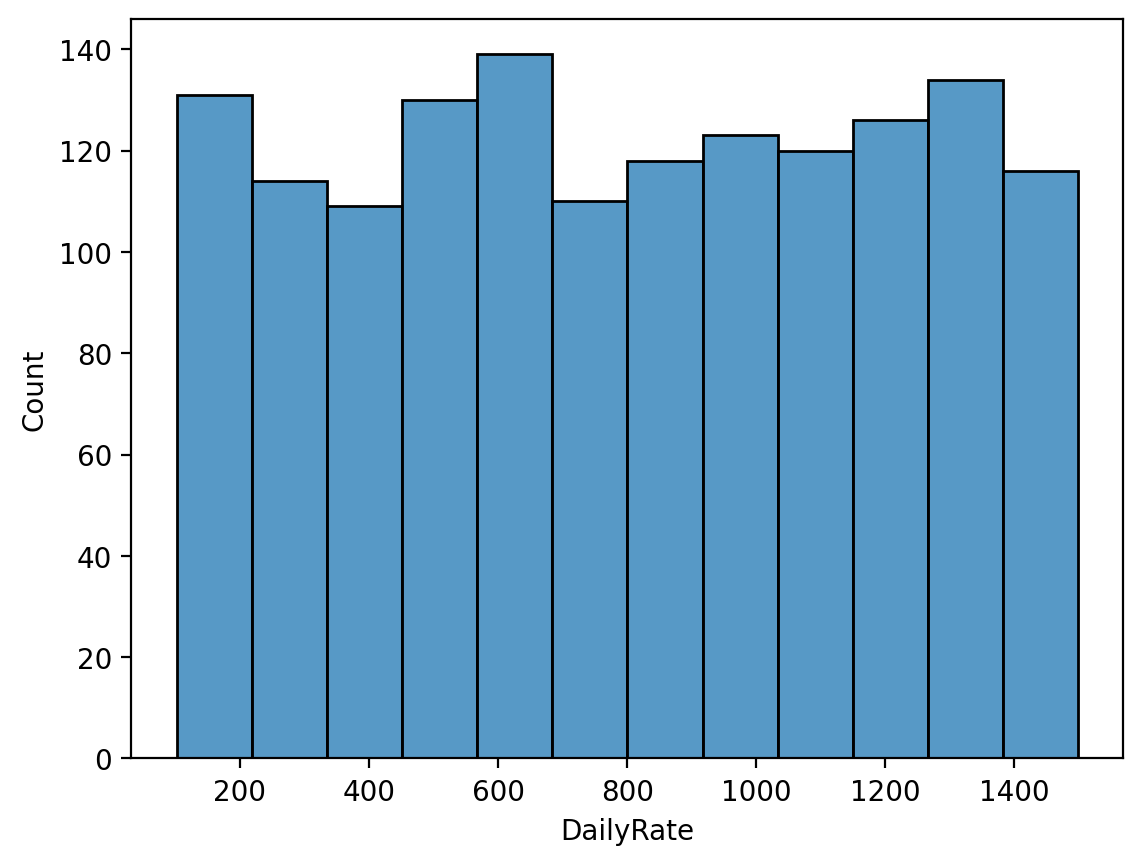

In [21]:
sns.histplot(df['DailyRate'])

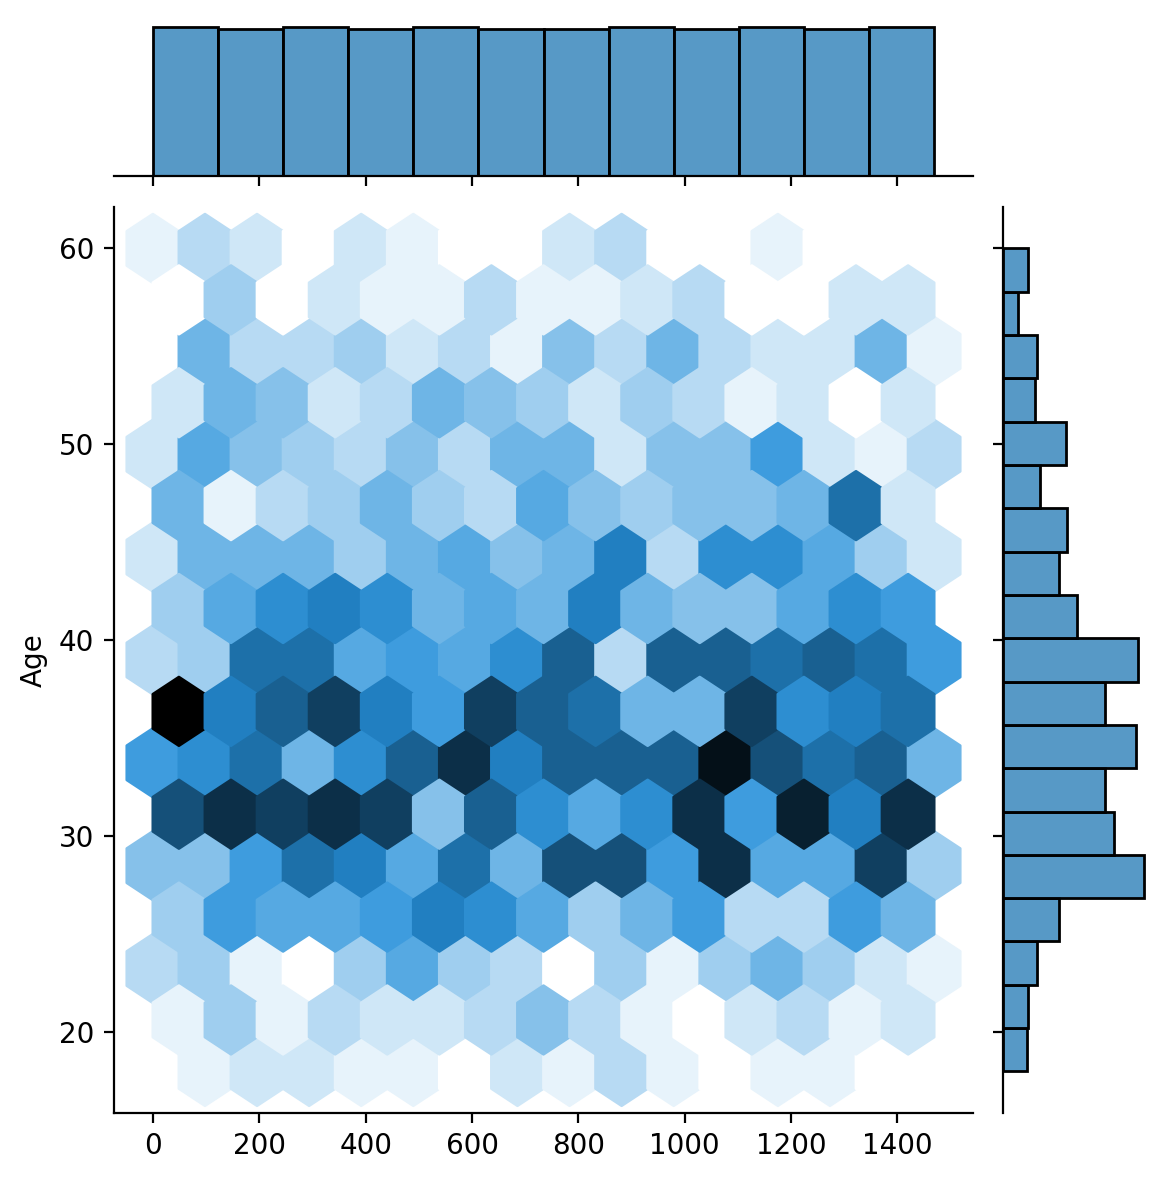

In [22]:
sns.jointplot(df['Age'],kind='hex')

<Axes: xlabel='Age', ylabel='Density'>

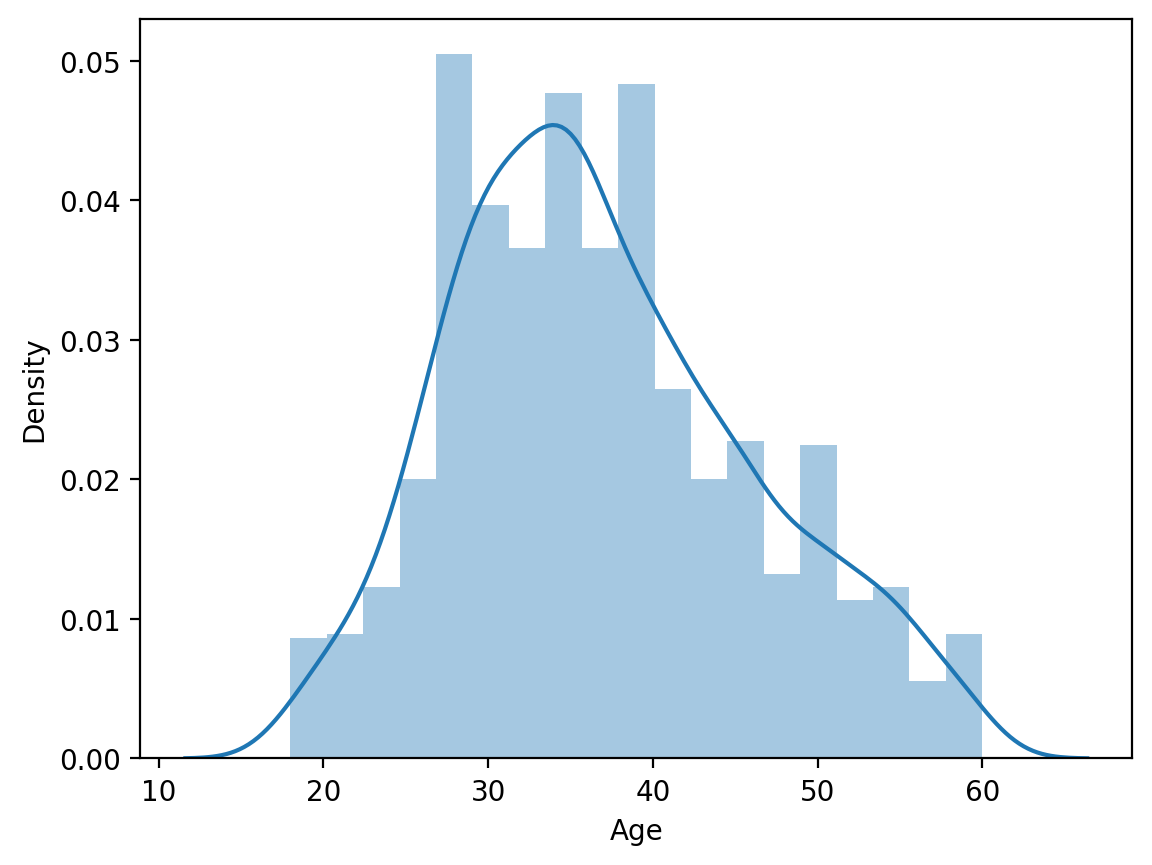

In [23]:
sns.distplot(df['Age'])

In [24]:
#sorting data by specific column
df.sort_values(by="Age")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1311,18,No,Non-Travel,1431,Research & Development,14,Bachelor,Medical,Medium,Female,33,High,1,Research Scientist,High,Single,1514,8018,1,No,16,Excellent,High,0,0,4,Bad,0,0,0,0
457,18,Yes,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,69,High,1,Sales Representative,Medium,Single,1878,8059,1,Yes,14,Excellent,Very High,0,0,3,Better,0,0,0,0
972,18,No,Non-Travel,1124,Research & Development,1,Bachelor,Life Sciences,Very High,Female,97,High,1,Laboratory Technician,Very High,Single,1611,19305,1,No,15,Excellent,High,0,0,5,Best,0,0,0,0
301,18,No,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very High,Female,69,Medium,1,Sales Representative,High,Single,1200,9724,1,No,12,Excellent,Low,0,0,2,Better,0,0,0,0
296,18,Yes,Travel_Rarely,230,Research & Development,3,Bachelor,Life Sciences,High,Male,54,High,1,Laboratory Technician,High,Single,1420,25233,1,No,13,Excellent,High,0,0,2,Better,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,60,No,Travel_Rarely,1179,Sales,16,Master,Marketing,Low,Male,84,High,2,Sales Executive,Low,Single,5405,11924,8,No,14,Excellent,Very High,0,10,1,Better,2,2,2,2
427,60,No,Travel_Frequently,1499,Sales,28,Bachelor,Marketing,High,Female,80,Medium,3,Sales Executive,Low,Married,10266,2845,4,No,19,Excellent,Very High,0,22,5,Best,18,13,13,11
411,60,No,Travel_Rarely,422,Research & Development,7,Bachelor,Life Sciences,Low,Female,41,High,5,Manager,Low,Married,19566,3854,5,No,11,Excellent,Very High,0,33,5,Bad,29,8,11,10
879,60,No,Travel_Rarely,696,Sales,7,Master,Marketing,Medium,Male,52,Very High,2,Sales Executive,Very High,Divorced,5220,10893,0,Yes,18,Excellent,Medium,1,12,3,Better,11,7,1,9


In [25]:
data=df.head(2)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [27]:
#Show all the columns in the dataframe
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [28]:
#data frmae size
df.shape

(1470, 31)

In [29]:
# # checjing for missing values


In [30]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [31]:
print("Missing Value:", df.isnull().any().any())

Missing Value: False


In [32]:
#checking for dupliacates in the dataset
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)
print(len(df))

False    1470
dtype: int64
1470


In [33]:
# # Distribution of  "Attrition"
df.Attrition

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

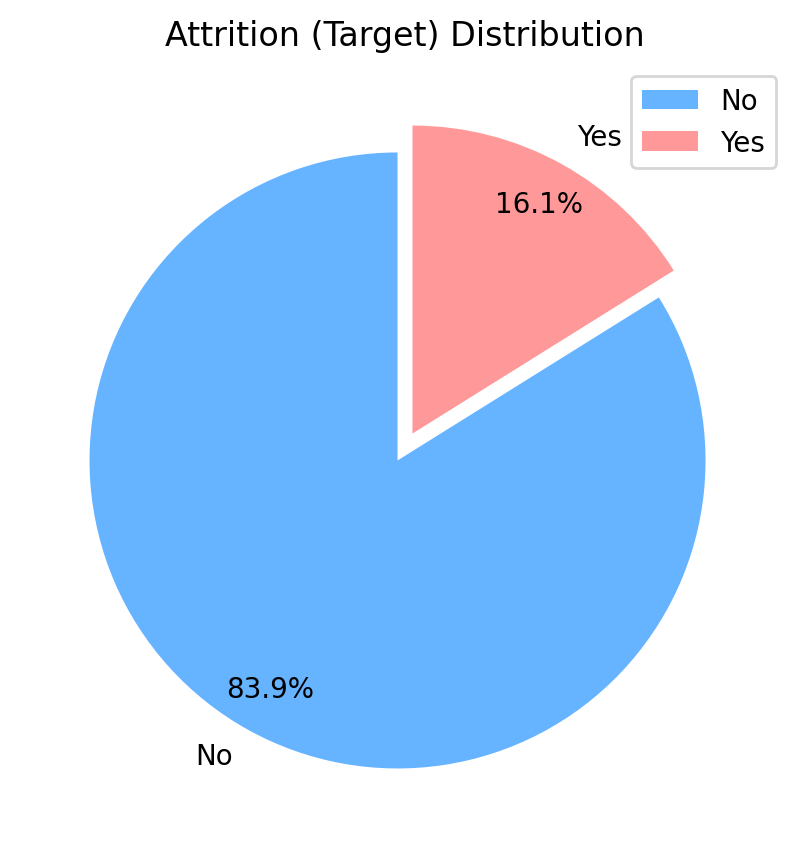

In [34]:
colors = ['#66b3ff', '#ff9999']
explode = (0.05,0.05)
plt.figure(figsize=(5, 5))
plt.pie(df['Attrition'].value_counts(), colors = colors, labels=['No', 'Yes'], 
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
plt.legend()
plt.title("Attrition (Target) Distribution")
plt.show()

In [35]:
# # Analysis of Numerical Features

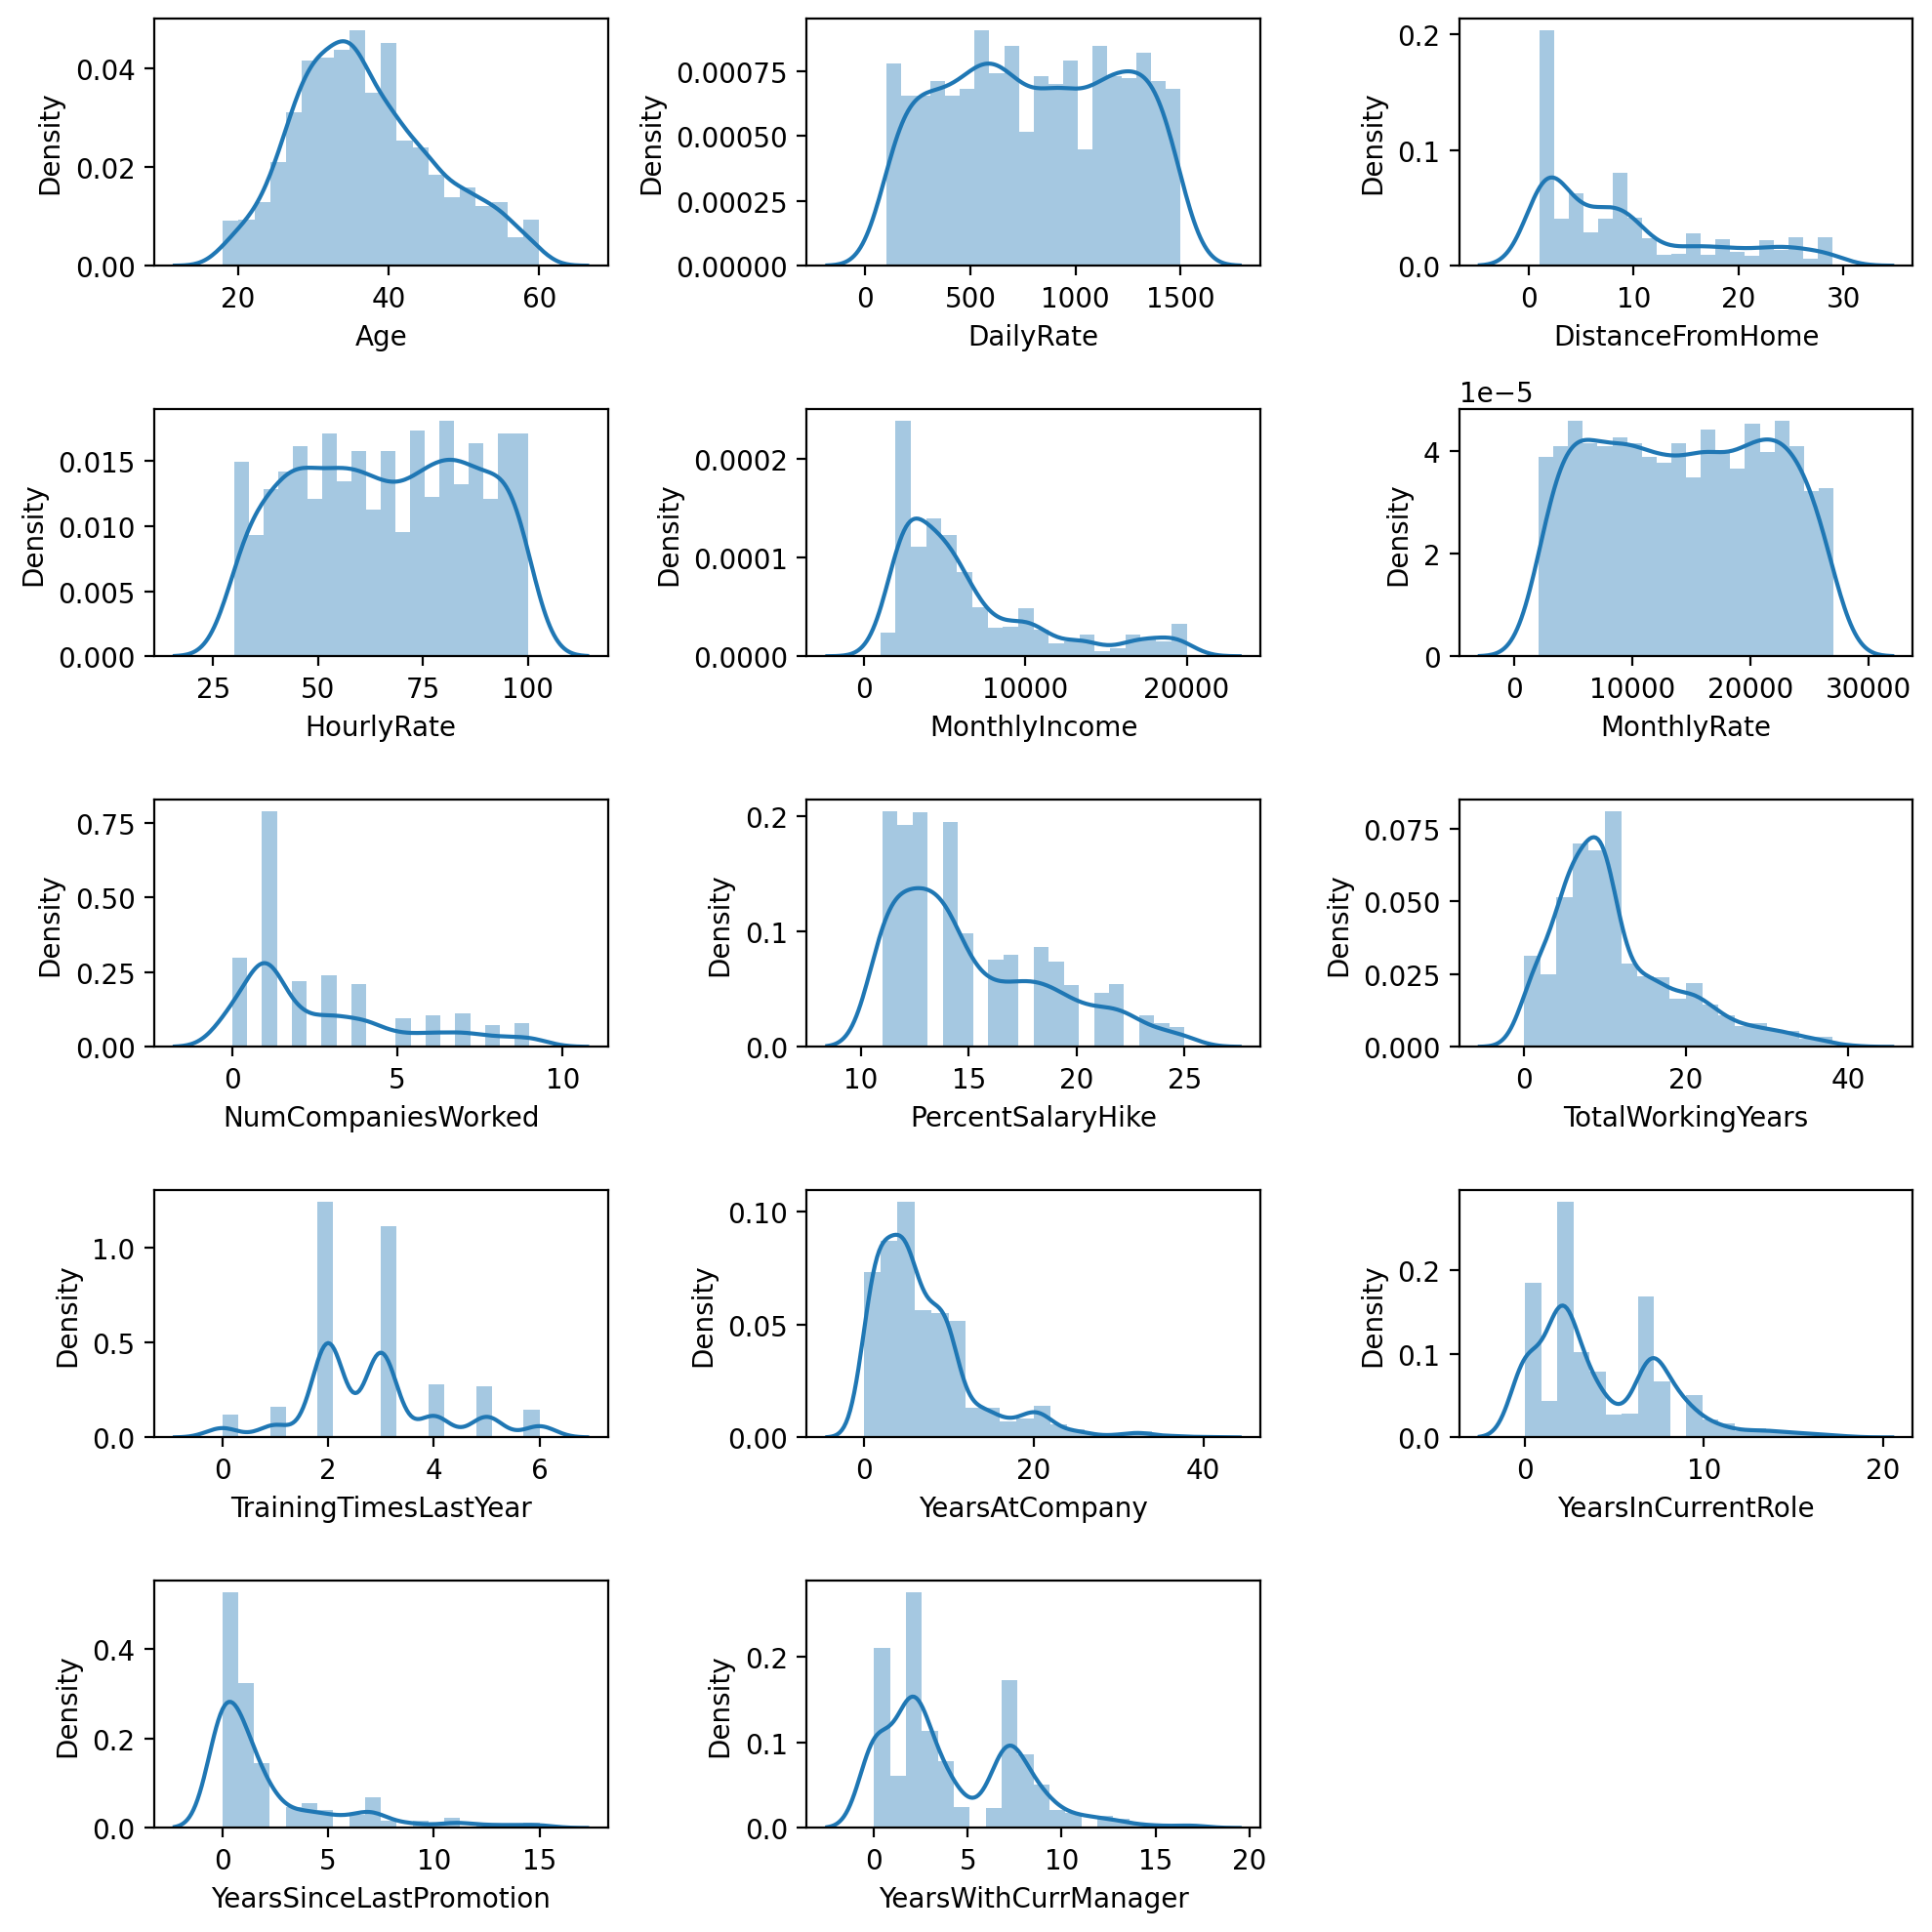

In [36]:
numerical_list = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                  'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_list, 1):
    plt.subplot(5, 3, i)
    sns.distplot(df[column], bins=20)
plt.tight_layout()
plt.show()

In [37]:
###Age: The age distribution of the dataset distributes normally which covers from 20 to 60. Most employees are 30 to 40.

###Most of employees live close to the company,most distance below 10km.

###The majority of monthly income of employees is around 5000. 

###Most employees have worked for one company.

###most people stay in the company for only for a few years.

###DailyRate, HourlyRate, and MonthlyRate are distributed uniformly which might imply that the figure is similar in different intervals.



In [38]:
#Analysis of Categorical Features

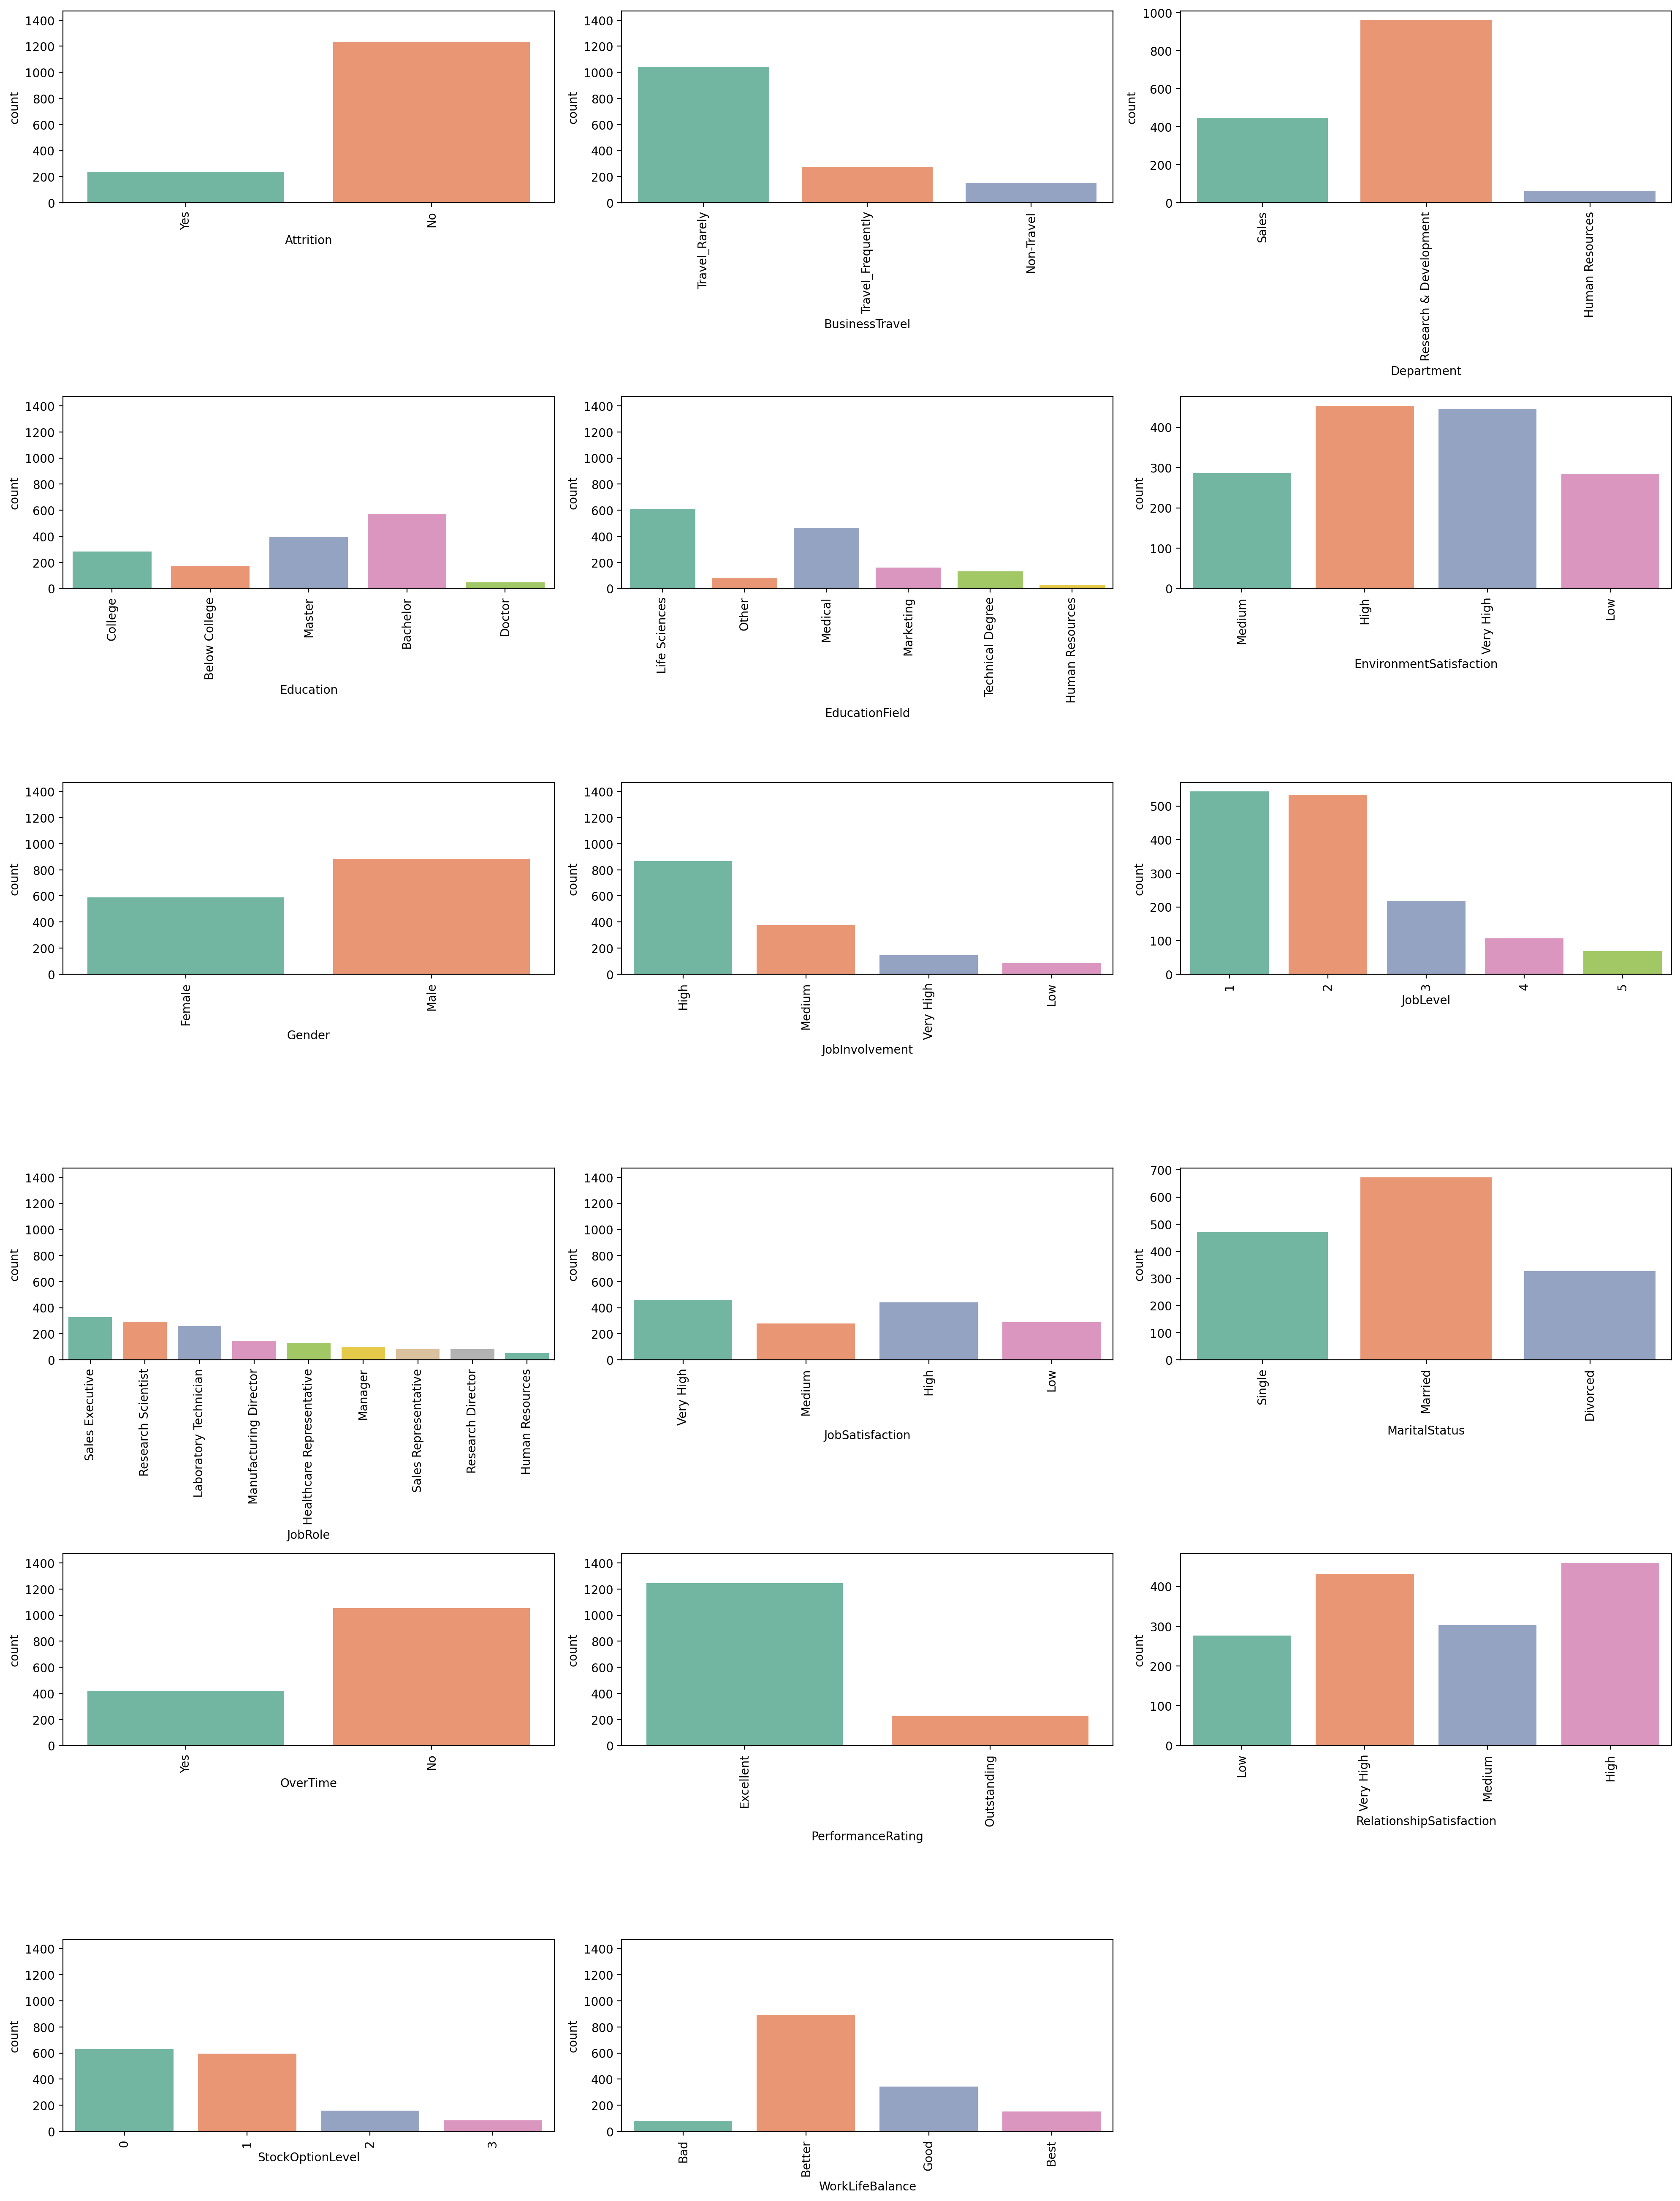

In [42]:
categorical_list = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 
             'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
             'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
             'StockOptionLevel', 'WorkLifeBalance']

# Create subplots
plt.figure(figsize=(20, 30))
gridspec = plt.GridSpec(7, 3)
locator1, locator2 = [0, 0]

for column in categorical_list:
    plt.subplot(gridspec[locator1, locator2])
    sns.countplot(data=df, x=column, palette='Set2')
    plt.xticks(rotation=90)
    
    locator2 += 1
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    if locator1 == 7:
        break
    # Set the y-axis limits to display more values
    plt.ylim(0, len(df))  # You can adjust the range as needed

plt.tight_layout()
plt.show()


In [43]:
###most of employees are satisfied, of which the number of "3" and "4" indicate high satisfaction are a lot.
###Most employees hold bachelor degree 
###many people major in life science.
###most of employees are relatively new to the company
###job level 1 is the majority job level.


In [44]:
# Correlation Analysis

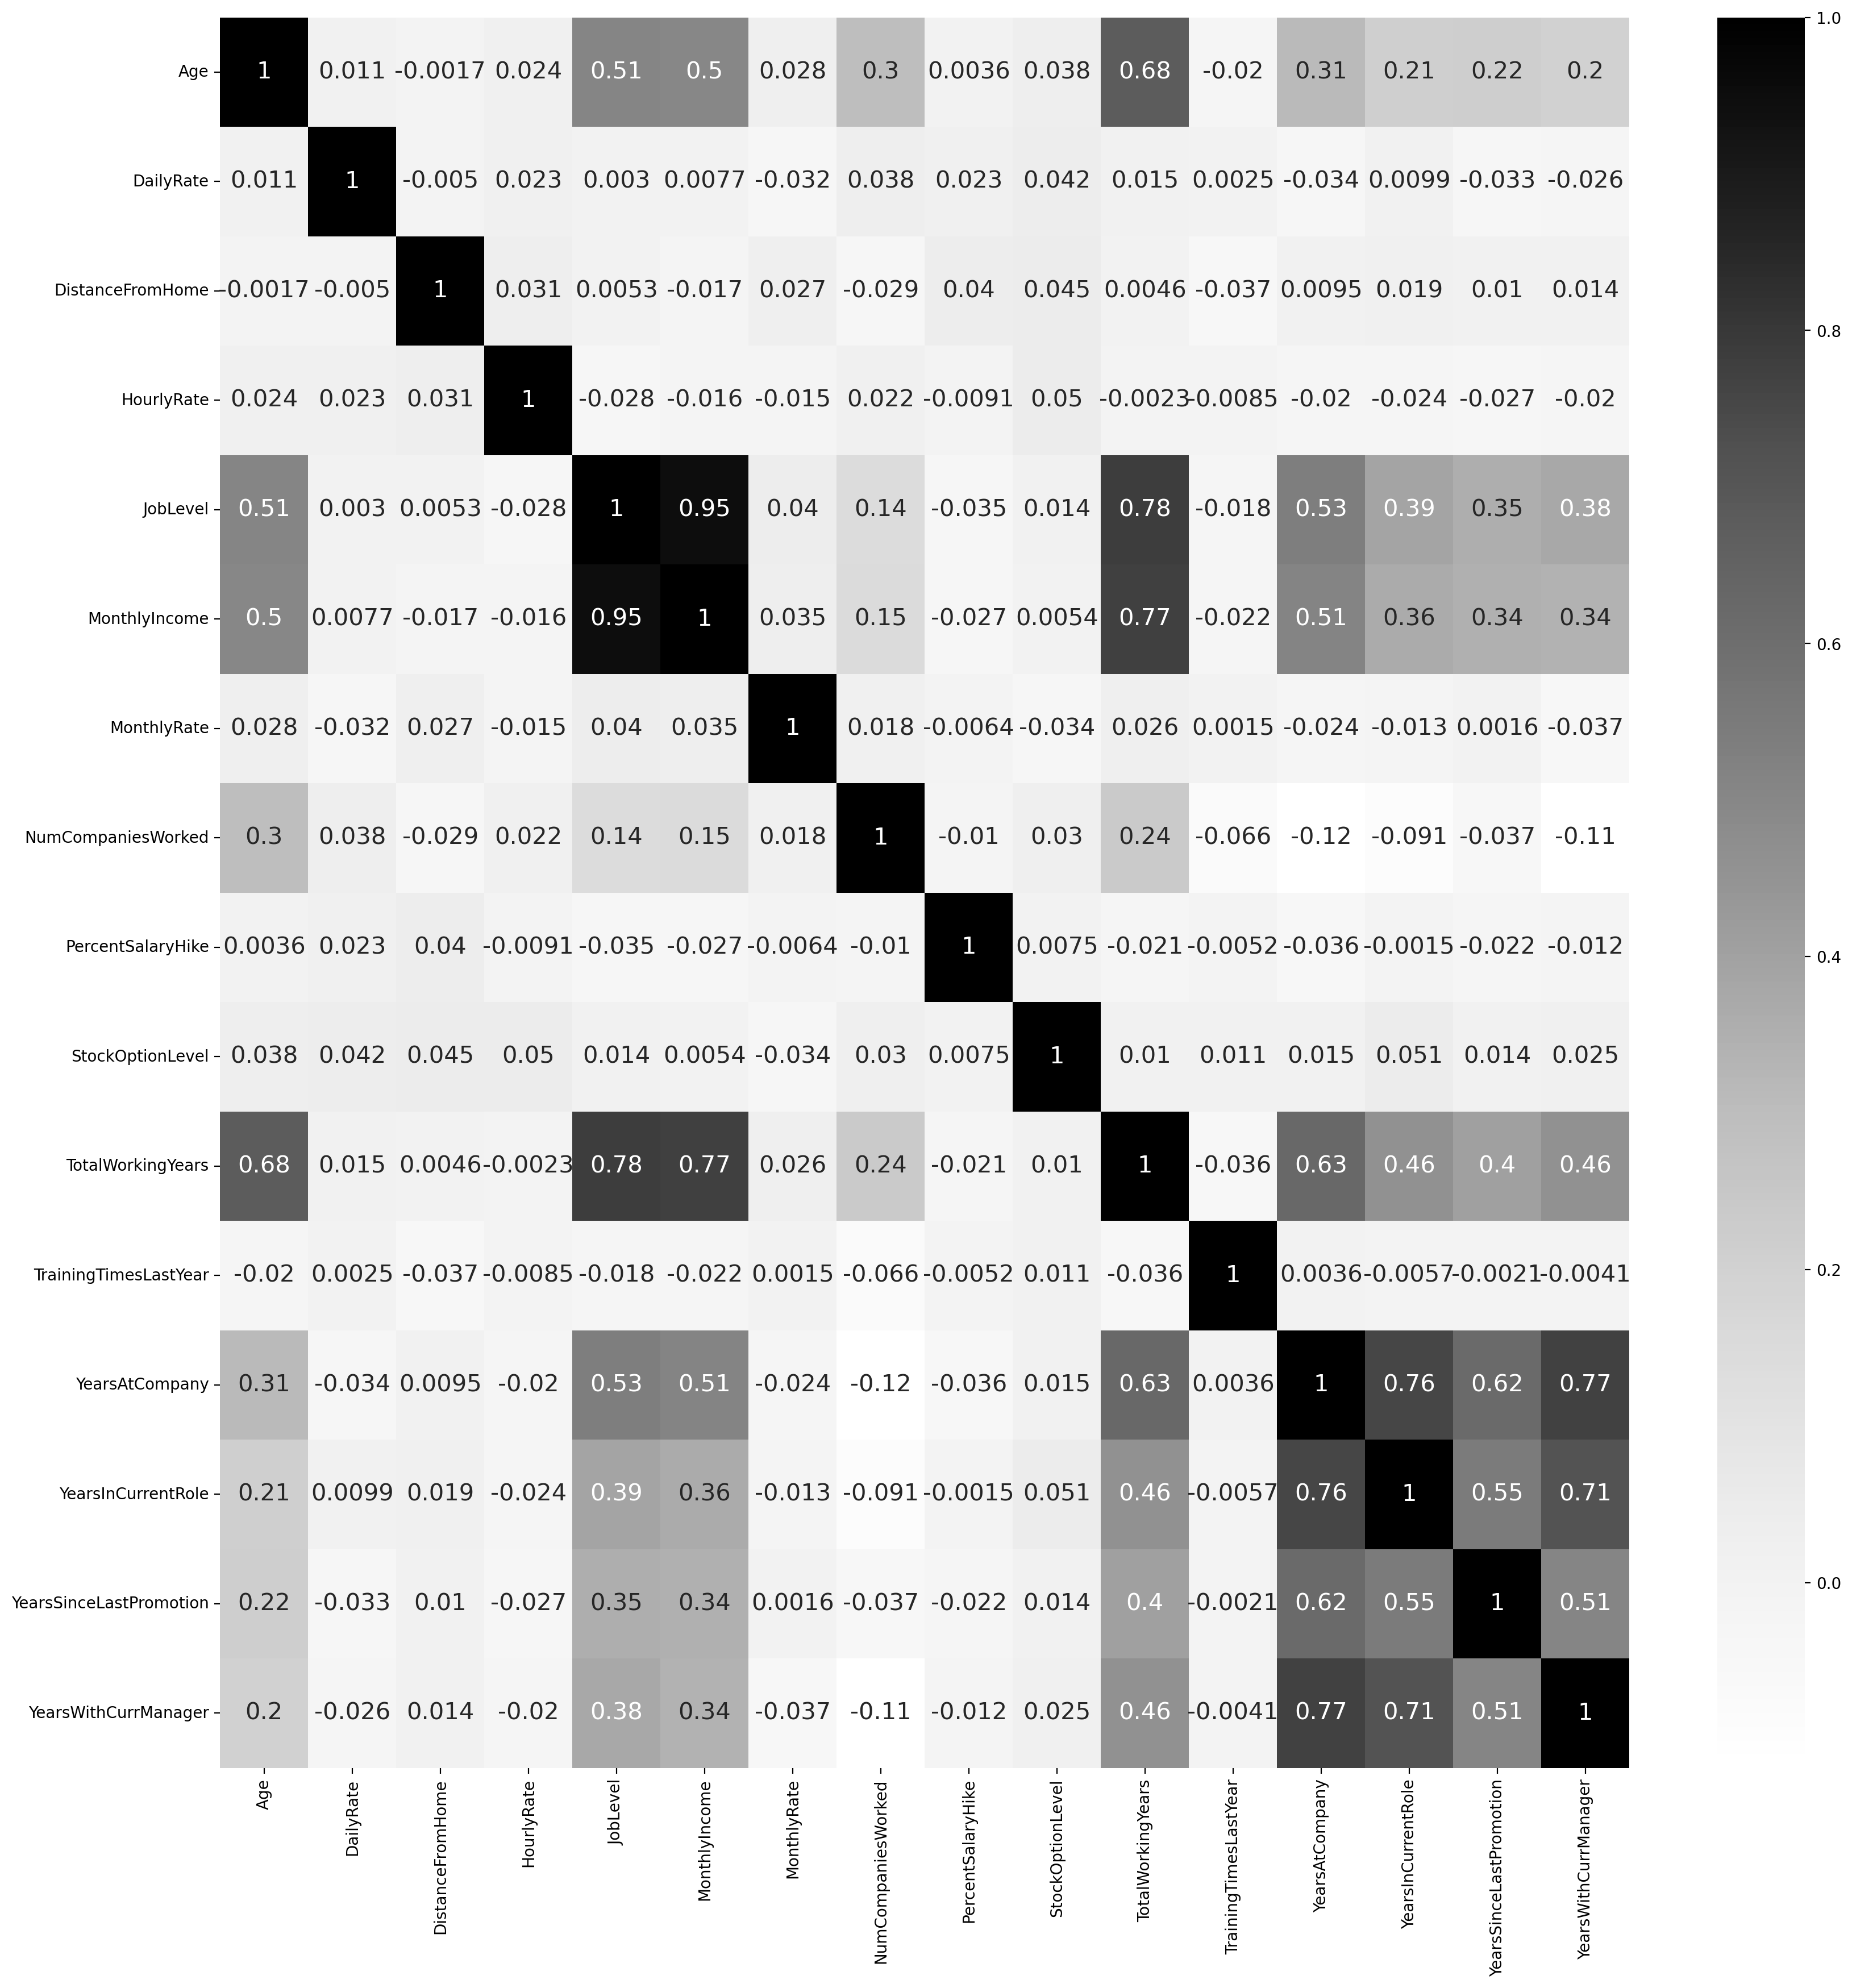

In [45]:
# Filter the DataFrame to include only numeric columns
numeric_columns = df.select_dtypes(include=[int, float])

# Create a correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="Greys", annot_kws={"size": 15})
plt.show()


In [46]:
#YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and with YearsWithCurrManager are correlated

#TotalWorkingYears,JobLevel and MonthlyIncomeare correlated

In [47]:
# Cross Analysis between Attrition and Categorical Features

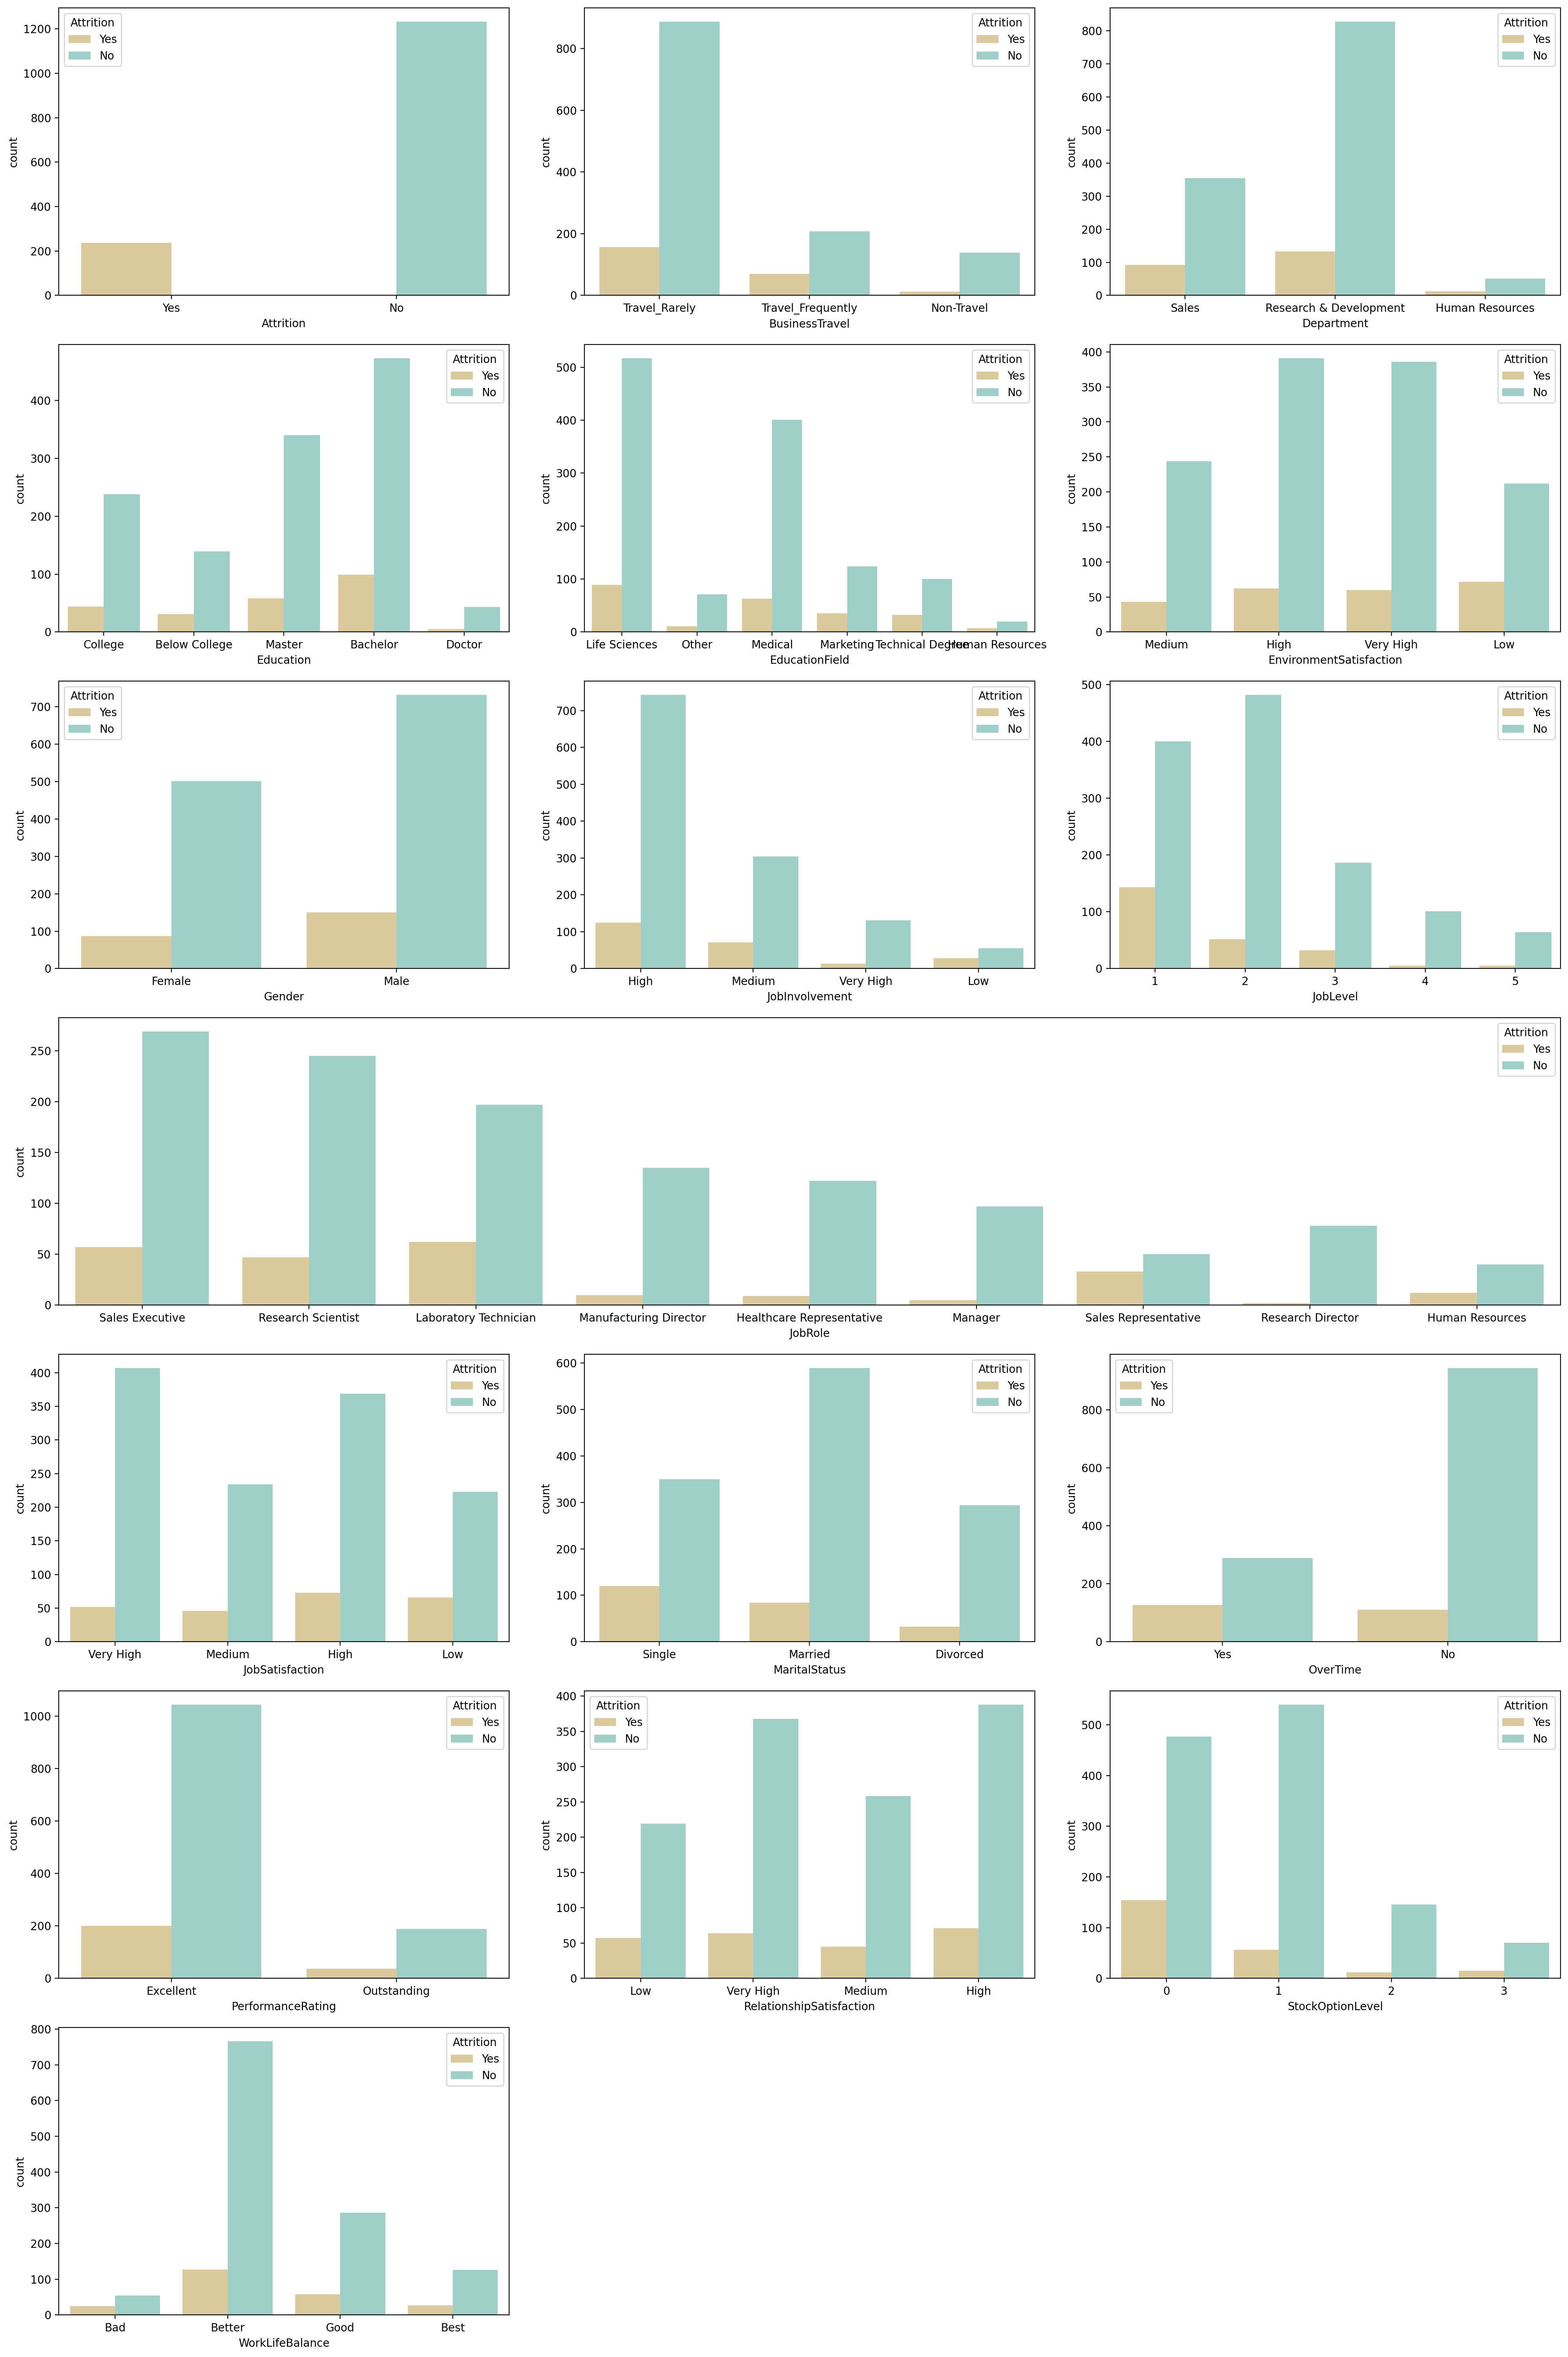

In [50]:
# Create subplots
plt.figure(figsize=(20, 30))
gridspec = plt.GridSpec(7, 3)
locator1, locator2 = [0, 0]

for column in categorical_list:
    if column == 'JobRole':
        plt.subplot2grid((7, 3), (locator1, locator2), colspan=3, rowspan=1)
        sns.countplot(x=column, hue='Attrition', data=df, palette='BrBG')
        locator1 += 1
        locator2 = 0
        continue
    plt.subplot2grid((7, 3), (locator1, locator2))
    sns.countplot(x=column, hue='Attrition', data=df, palette='BrBG')
    locator2 += 1
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    if locator1 == 7:
        break
plt.tight_layout()
plt.show()


In [51]:
#Employees with business travel are more likely leave the company.

#Human Resource employees are the most stable group of employees.

#Employees with a Doctor's degree are stable.

#Technical employees tend to leave.

#Low performance rating and low stock option level may result employees' attrition

In [52]:
# Feature selection 

In [53]:
#Encoding of Categorical Features

In [56]:
# Filter the list to exclude columns that don't exist in your DataFrame
cate_list_filtered = [col for col in categorical_list if col in df.columns]

# Select the categorical columns from the DataFrame
data_categorical = df[cate_list_filtered]

# Display the head of the categorical data
data_categorical.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,2,Sales Executive,Very High,Single,Yes,Excellent,Low,0,Bad
1,No,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,2,Research Scientist,Medium,Married,No,Outstanding,Very High,1,Better
2,Yes,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,1,Laboratory Technician,High,Single,Yes,Excellent,Medium,0,Better
3,No,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,1,Research Scientist,High,Married,Yes,Excellent,High,0,Better
4,No,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,1,Laboratory Technician,Medium,Married,No,Excellent,Very High,1,Better


In [57]:
#Encoding Categorical Values using OneHot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first').set_output(transform="pandas")
data_encoded = encoder.fit_transform(data_categorical)
data_encoded.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Below College,Education_College,Education_Doctor,Education_Master,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very High,Gender_Male,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [58]:
#Encoding of Numerical Features

In [59]:
std = preprocessing.StandardScaler()
scaled = std.fit_transform(df[numerical_list])
scaled = pd.DataFrame(scaled, columns=numerical_list)

display(scaled.head())

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227


In [60]:
#Combine the encoded dataframe with the scaled dataframe
new_df = pd.concat([scaled, data_encoded], axis=1)
new_df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Below College,Education_College,Education_Doctor,Education_Master,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very High,Gender_Male,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [61]:
new_df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'Education_Below College', 'Education_College',
       'Education_Doctor', 'Education_Master', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction_Low', 'EnvironmentSatisfaction_Medium',
       'EnvironmentSatisfaction_Very High', 'Gender_Male',
       'JobInvolvement_Low', 'JobInvolvement_Medium',
       'JobInvolvement_Very High', 'JobLevel_2', 'JobLevel_3', 'JobLevel_4',
       'JobLevel_5', 'JobRo

In [62]:

X = new_df[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'Education_Below College', 'Education_College',
       'Education_Doctor', 'Education_Master', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction_Low', 'EnvironmentSatisfaction_Medium',
       'EnvironmentSatisfaction_Very High', 'Gender_Male',
       'JobInvolvement_Low', 'JobInvolvement_Medium',
       'JobInvolvement_Very High', 'JobLevel_2', 'JobLevel_3', 'JobLevel_4',
       'JobLevel_5', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'JobSatisfaction_Low',
       'JobSatisfaction_Medium', 'JobSatisfaction_Very High',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'PerformanceRating_Outstanding', 'RelationshipSatisfaction_Low',
       'RelationshipSatisfaction_Medium', 'RelationshipSatisfaction_Very High',
       'StockOptionLevel_1', 'StockOptionLevel_2', 'StockOptionLevel_3',
       'WorkLifeBalance_Best', 'WorkLifeBalance_Better',
       'WorkLifeBalance_Good']]

y = new_df['Attrition_Yes']


In [63]:
#Getting feature importance using correlation

In [64]:
#Getting feature importance using correlation

target = new_df['Attrition_Yes']

# Calculate Pearson correlation coefficients
correlations = new_df.drop(columns=['Attrition_Yes']).apply(lambda x: x.corr(target))

# Take absolute values and sort in descending order
correlations = correlations.abs().sort_values(ascending=False)

# Set the maximum column width to show the entire content
pd.set_option('display.max_colwidth', None)

# Print the ranked feature importances
with pd.option_context('display.max_rows', None):
    print(correlations)

# Reset the display options to their default values (if needed)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

OverTime_Yes                          0.246118
MaritalStatus_Single                  0.175419
TotalWorkingYears                     0.171063
YearsInCurrentRole                    0.160545
MonthlyIncome                         0.159840
Age                                   0.159205
JobRole_Sales Representative          0.157234
YearsWithCurrManager                  0.156199
StockOptionLevel_1                    0.151049
YearsAtCompany                        0.134392
JobLevel_2                            0.131138
EnvironmentSatisfaction_Low           0.122819
JobInvolvement_Low                    0.117161
BusinessTravel_Travel_Frequently      0.115143
JobRole_Laboratory Technician         0.098290
MaritalStatus_Married                 0.090984
JobSatisfaction_Low                   0.090329
JobRole_Research Director             0.088870
JobSatisfaction_Very High             0.087830
JobLevel_4                            0.086461
Department_Research & Development     0.085293
JobRole_Manag

In [65]:

# Your correlations data
correlations = {
    'OverTime_Yes': 0.246118,
    'MaritalStatus_Single': 0.175419,
    'TotalWorkingYears': 0.171063,
    'YearsInCurrentRole': 0.160545,
    'MonthlyIncome': 0.159840,
    'Age': 0.159205,
    'JobRole_Sales Representative': 0.157234,
    'YearsWithCurrManager': 0.156199,
    'StockOptionLevel_1': 0.151049,
    'YearsAtCompany': 0.134392,
    'JobLevel_2': 0.131138,
    'EnvironmentSatisfaction_Low': 0.122819,
    'JobInvolvement_Low': 0.117161,
    'BusinessTravel_Travel_Frequently': 0.115143,
    'JobRole_Laboratory Technician': 0.098290,
    'MaritalStatus_Married': 0.090984,
    'JobSatisfaction_Low': 0.090329,
    'JobRole_Research Director': 0.088870,
    'JobSatisfaction_Very High': 0.087830,
    'JobLevel_4': 0.086461,
    'Department_Research & Development': 0.085293,
    'JobRole_Manager': 0.083316,
    'JobRole_Manufacturing Director': 0.082994,
    'Department_Sales': 0.080855,
    'StockOptionLevel_2': 0.080472,
    'DistanceFromHome': 0.077924,
    'EducationField_Technical Degree': 0.069355,
    'WorkLifeBalance_Better': 0.064301,
    'JobInvolvement_Very High': 0.063577,
    'TrainingTimesLastYear': 0.059478,
    'RelationshipSatisfaction_Low': 0.059222,
    'DailyRate': 0.056652,
    'EducationField_Marketing': 0.055781,
    'JobLevel_5': 0.053566,
    'BusinessTravel_Travel_Rarely': 0.049538,
    'EnvironmentSatisfaction_Very High': 0.047909,
    'EducationField_Medical': 0.046999,
    'JobInvolvement_Medium': 0.044731,
    'NumCompaniesWorked': 0.043494,
    'JobRole_Human Resources': 0.036215,
    'YearsSinceLastPromotion': 0.033019,
    'EducationField_Life Sciences': 0.032703,
    'Gender_Male': 0.029453,
    'Education_Doctor': 0.028507,
    'Education_Master': 0.025676,
    'RelationshipSatisfaction_Very High': 0.022940,
    'Education_Below College': 0.020777,
    'JobRole_Sales Executive': 0.019774,
    'EducationField_Other': 0.017898,
    'RelationshipSatisfaction_Medium': 0.017611,
    'JobLevel_3': 0.016380,
     'JobLevel_3': 0.016380,
    'EnvironmentSatisfaction_Medium': 0.015267,
    'MonthlyRate': 0.015170,
    'WorkLifeBalance_Best': 0.014131,
    'PercentSalaryHike': 0.013478,
    'WorkLifeBalance_Good': 0.011093,
    'StockOptionLevel_3': 0.010271,
    'Education_College': 0.006884,
    'HourlyRate': 0.006846,
    'JobSatisfaction_Medium': 0.004038,
    'PerformanceRating_Outstanding': 0.002889,
    'JobRole_Research Scientist': 0.000360,
}
# Initialize two empty lists
index = []
dropped = []

# Iterate through the correlations and categorize columns
for column, correlation in correlations.items():
    if correlation >= 0.05:
        index.append(column)
    else:
        dropped.append(column)

# Print the lists
print("Selected featured:", index)
print("Dropped features:", dropped)

Selected featured: ['OverTime_Yes', 'MaritalStatus_Single', 'TotalWorkingYears', 'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'JobRole_Sales Representative', 'YearsWithCurrManager', 'StockOptionLevel_1', 'YearsAtCompany', 'JobLevel_2', 'EnvironmentSatisfaction_Low', 'JobInvolvement_Low', 'BusinessTravel_Travel_Frequently', 'JobRole_Laboratory Technician', 'MaritalStatus_Married', 'JobSatisfaction_Low', 'JobRole_Research Director', 'JobSatisfaction_Very High', 'JobLevel_4', 'Department_Research & Development', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'Department_Sales', 'StockOptionLevel_2', 'DistanceFromHome', 'EducationField_Technical Degree', 'WorkLifeBalance_Better', 'JobInvolvement_Very High', 'TrainingTimesLastYear', 'RelationshipSatisfaction_Low', 'DailyRate', 'EducationField_Marketing', 'JobLevel_5']
Dropped features: ['BusinessTravel_Travel_Rarely', 'EnvironmentSatisfaction_Very High', 'EducationField_Medical', 'JobInvolvement_Medium', 'NumCompaniesWorked', 'JobRol

In [66]:
new_df = new_df.drop(columns=dropped)
new_df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Marketing',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction_Low',
       'JobInvolvement_Low', 'JobInvolvement_Very High', 'JobLevel_2',
       'JobLevel_4', 'JobLevel_5', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Sales Representative',
       'JobSatisfaction_Low', 'JobSatisfaction_Very High',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'RelationshipSatisfaction_Low', 'StockOptionLevel_1',
       'StockOptionLevel_2', 'WorkLifeBalance_Better'],
      dtype='object')

In [67]:
#Model Building

In [68]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# machine learning model
model = DecisionTreeClassifier()

# Load your dataset and perform feature/target splitting
X = new_df.drop(columns=['Attrition_Yes'])
y = new_df['Attrition_Yes']

# Define the number of folds
num_folds = 5

# Create a K-Fold cross-validator with 5 folds
kf = KFold(n_splits=num_folds)

# Lists to store cross-validation results
train_scores = []
test_scores = []

# Perform k-fold cross-validation and calculate performance metrics
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the test fold
    y_test_pred = model.predict(X_test_fold)

    # Calculate accuracy on the training and test folds
    train_accuracy = accuracy_score(y_train_fold, model.predict(X_train_fold))
    test_accuracy = accuracy_score(y_test_fold, y_test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Print the cross-validation results
for fold, (train_score, test_score) in enumerate(zip(train_scores, test_scores), start=1):
    print(f"Fold {fold}: Train Accuracy = {train_score:.2f}, Test Accuracy = {test_score:.2f}")

mean_train_accuracy = sum(train_scores) / len(train_scores)
mean_test_accuracy = sum(test_scores) / len(test_scores)

print(f"Mean Train Accuracy = {mean_train_accuracy:.2f}")
print(f"Mean Test Accuracy = {mean_test_accuracy:.2f}")

Fold 1: Train Accuracy = 1.00, Test Accuracy = 0.77
Fold 2: Train Accuracy = 1.00, Test Accuracy = 0.82
Fold 3: Train Accuracy = 1.00, Test Accuracy = 0.79
Fold 4: Train Accuracy = 1.00, Test Accuracy = 0.76
Fold 5: Train Accuracy = 1.00, Test Accuracy = 0.85
Mean Train Accuracy = 1.00
Mean Test Accuracy = 0.80


In [69]:
from sklearn.metrics import confusion_matrix

# ... (Previous code for k-fold cross-validation)

# Lists to store confusion matrices
confusion_matrices = []

# Perform k-fold cross-validation and calculate confusion matrices
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the test fold
    y_test_pred = model.predict(X_test_fold)

    # Calculate the confusion matrix for the test fold
    confusion_matrix_fold = confusion_matrix(y_test_fold, y_test_pred)
    confusion_matrices.append(confusion_matrix_fold)

# Print the confusion matrices for each fold
for fold, confusion_matrix_fold in enumerate(confusion_matrices, start=1):
    print(f"Confusion Matrix for Fold {fold}:\n{confusion_matrix_fold}")


Confusion Matrix for Fold 1:
[[208  39]
 [ 34  13]]
Confusion Matrix for Fold 2:
[[220  31]
 [ 22  21]]
Confusion Matrix for Fold 3:
[[213  22]
 [ 35  24]]
Confusion Matrix for Fold 4:
[[208  41]
 [ 30  15]]
Confusion Matrix for Fold 5:
[[233  18]
 [ 25  18]]


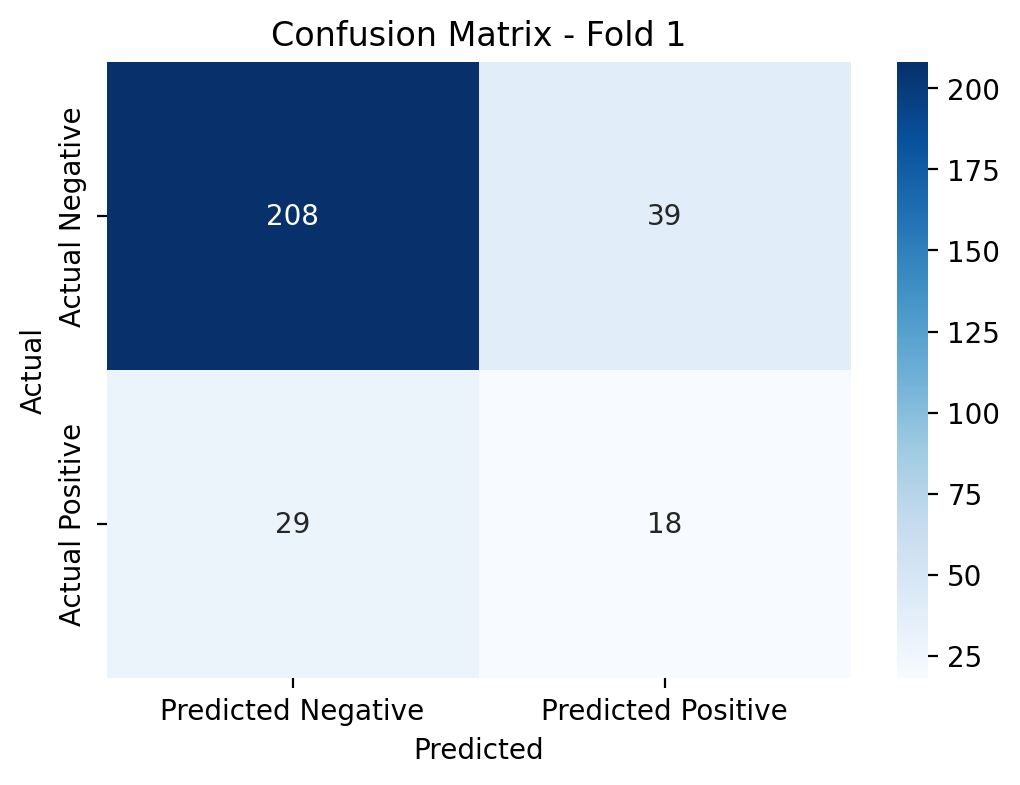

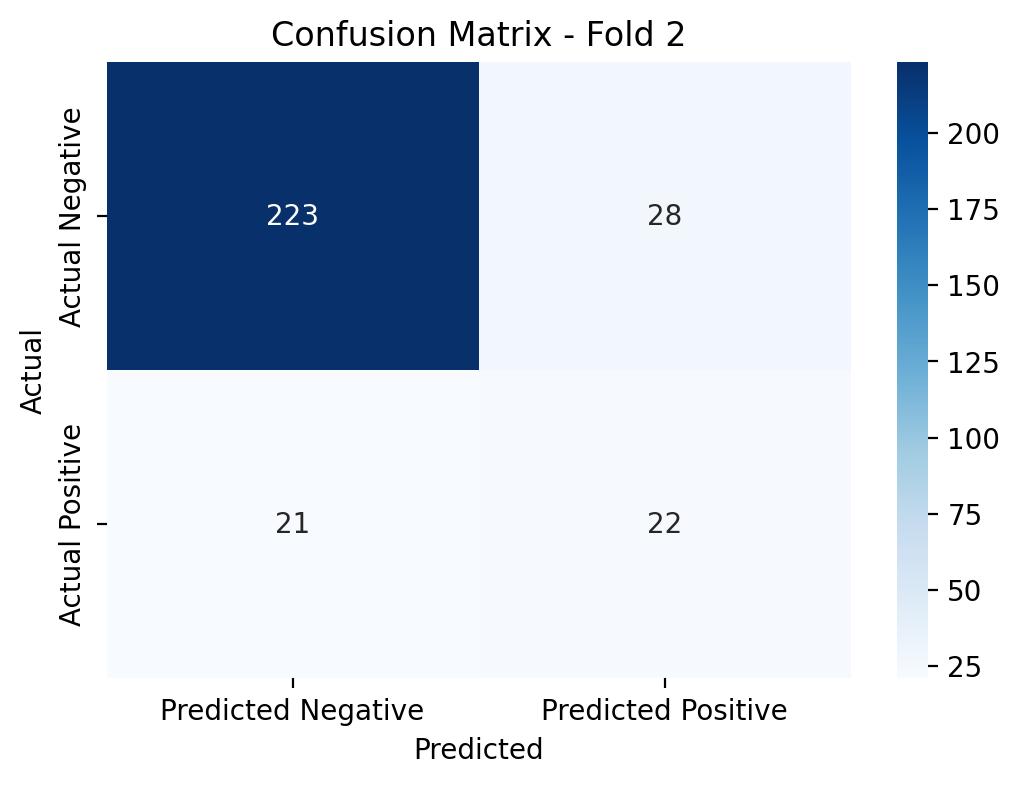

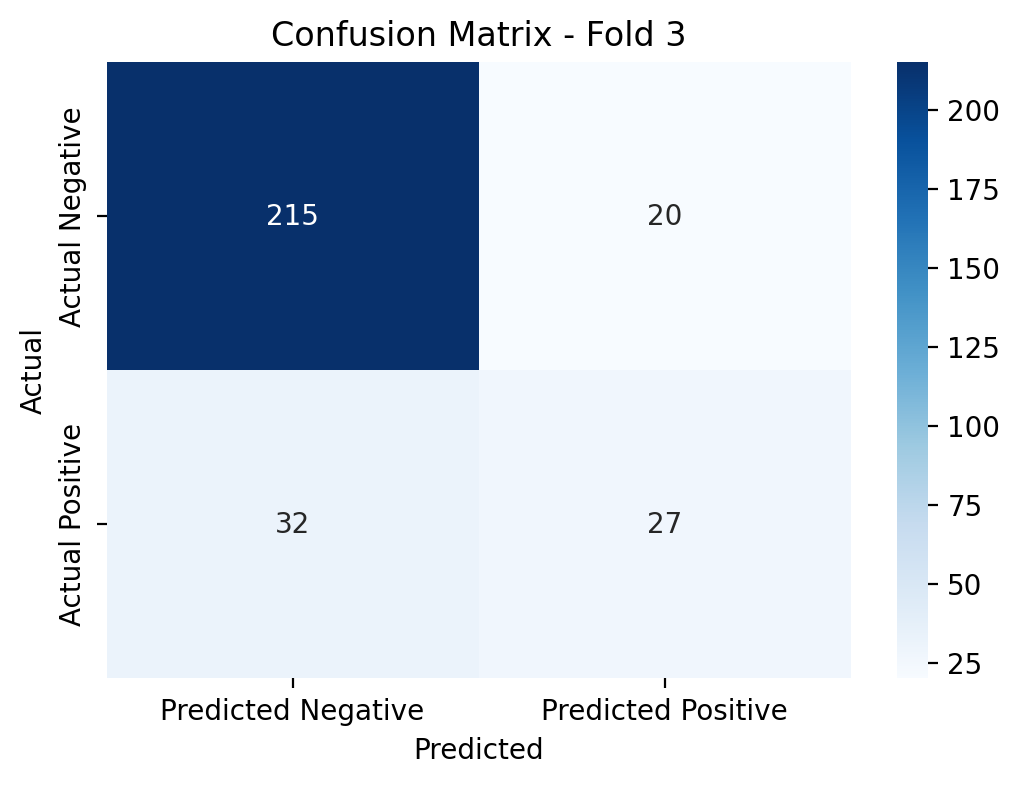

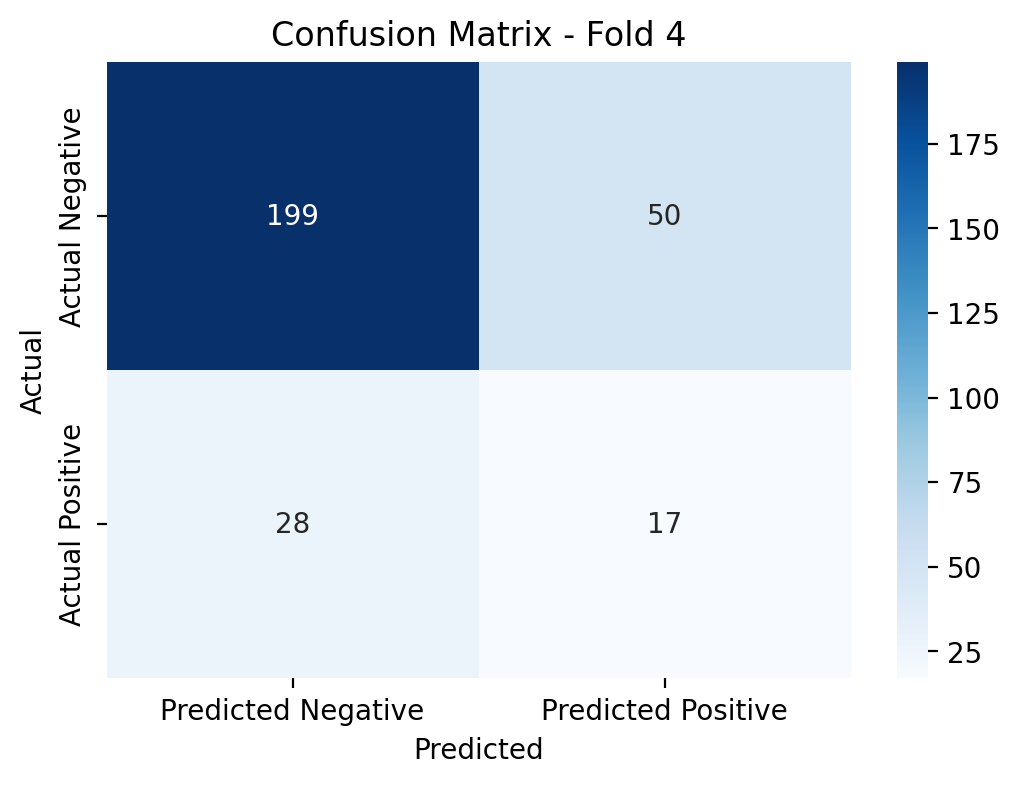

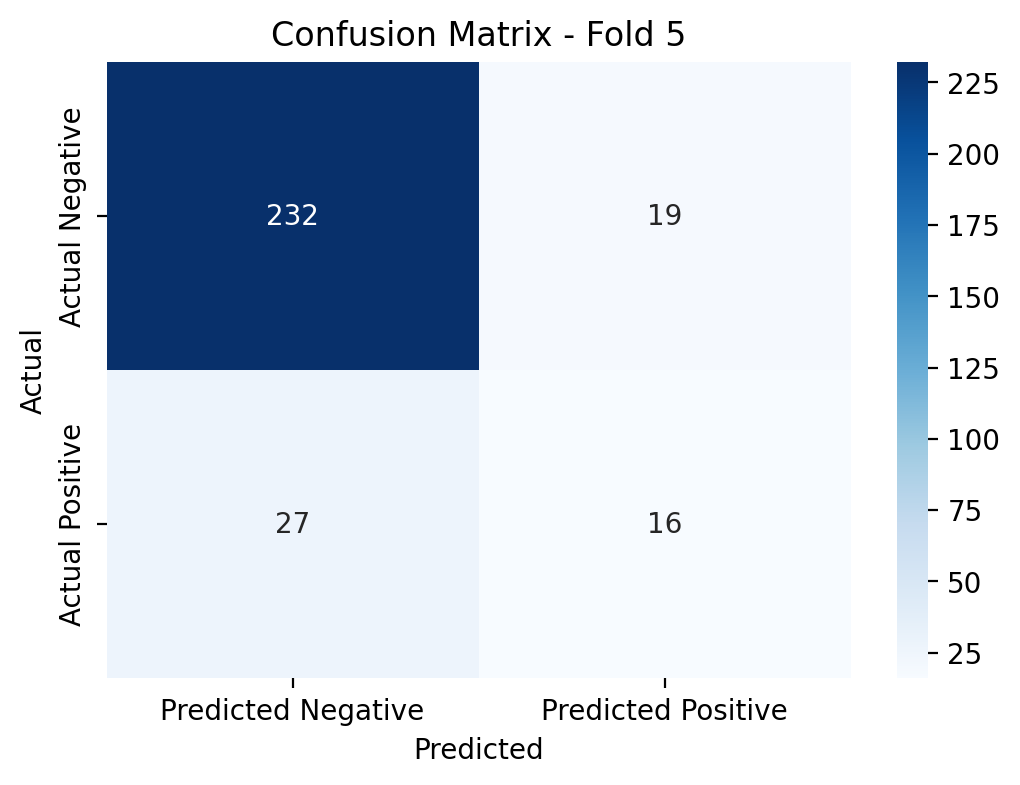

In [70]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# ... (Previous code for k-fold cross-validation)

# Lists to store confusion matrices and labels
confusion_matrices = []
fold_labels = []

# Perform k-fold cross-validation and calculate confusion matrices
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the test fold
    y_test_pred = model.predict(X_test_fold)

    # Calculate the confusion matrix for the test fold
    confusion_matrix_fold = confusion_matrix(y_test_fold, y_test_pred)
    confusion_matrices.append(confusion_matrix_fold)
    fold_labels.append(f"Fold {fold}")

# Plot confusion matrices
for fold, confusion_matrix_fold in enumerate(confusion_matrices):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix_fold, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix - {fold_labels[fold]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
